# Question 1

In [29]:
!pip install manim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.5/524.5 kB 683.1 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 342.5 kB/s eta 0:00:0031m1.9 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.4 MB/s eta 0:00:00
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 935.7 kB/s eta 0:00:00MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 1.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.7/123.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 509.0 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 812.4 kB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for click-default-group: filename=click_default_group-1.2.2-py3-none-any.whl size=3383 

In [30]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.17.2

In [11]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
x, y = symbols('x y')

In [12]:
def f1(x, y):
    return (x**2+y**2-1)/(x**2+y**2+1)

In [50]:
%%manim -qm Example
class Example(ThreeDScene):
    def construct(self):
        axes_config = {
            "x_range": [-4, 4],
            "y_range": [-4, 4],
            "z_range": [-5, 5],
        }

        axes = ThreeDAxes(**axes_config)
        
        self.set_camera_orientation(phi=70*DEGREES,
                                    theta=-40*DEGREES,
                                    distance=6)
        
        self.begin_ambient_camera_rotation(rate=0.9)
        self.add(axes)
        
        text1 = Tex(r"La fonction $f(x,y)=\frac{x^2+y^2-1}{x^2+y^2+1}$").scale(1) 
        text2 = Tex(r"et le plan $z=0$").scale(1) 
        text1.shift(LEFT*1 + UP*3)
        text2.shift(LEFT*1 + UP*2)
        PlaneSurface = Surface(
            lambda u, v: np.array([
                u, v, f1(u,v)
            ]), u_range=(-5, 5), v_range=(-5, 5), resolution=(15, 50)
        )

        PlaneSurface2 = Surface(
            lambda u, v: np.array([
                u, v, 0
            ]), u_range=(-5, 5), v_range=(-5, 5), resolution=(15, 50), color=RED
        )

        self.add_fixed_in_frame_mobjects(text1)
        self.play(Write(text1)) # Without this line, it will appear directly.
        self.play(Write(PlaneSurface), run_time=3)
        self.wait(3)
        self.add_fixed_in_frame_mobjects(text2)
        self.play(Write(text2)) # Without this line, it will appear directly.
        self.play(Write(PlaneSurface2), run_time=3)
        self.begin_ambient_camera_rotation(rate=0.9, about="phi")
        
        self.wait(13)

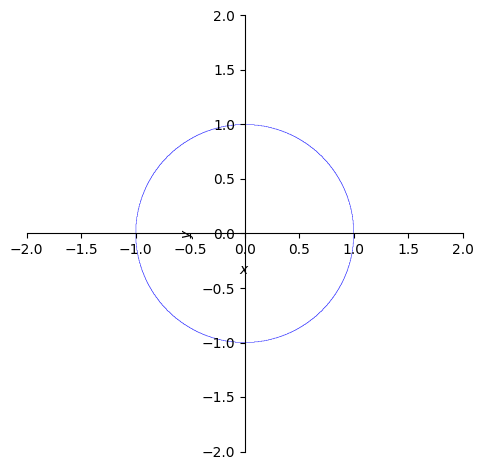

In [13]:


# trace la fonctions phi sur un voisinage
plot_implicit(f1(x, y), (x, -2, 2), (y, -2, 2),aspect_ratio=(1,1))

# Question 2

In [51]:
def g(x, y):
    return y**2-1+sin(pi*x)

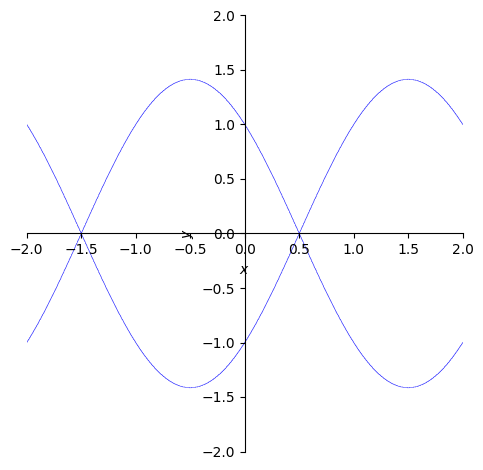

In [15]:
plot_implicit(g(x, y), (x, -2, 2), (y, -2, 2),aspect_ratio=(1,1))

développement limité au voisinage du point (0,1)

In [16]:
a0, a1, a2, a3,a4,a5,a6= symbols('a_0 a_1 a_2 a_3 a_4 a_5 a_6')
DL = a0+a1*x +a2*x**2+a3*x**3+a4*x**4+a5*x**5+ O(x**6)
DL

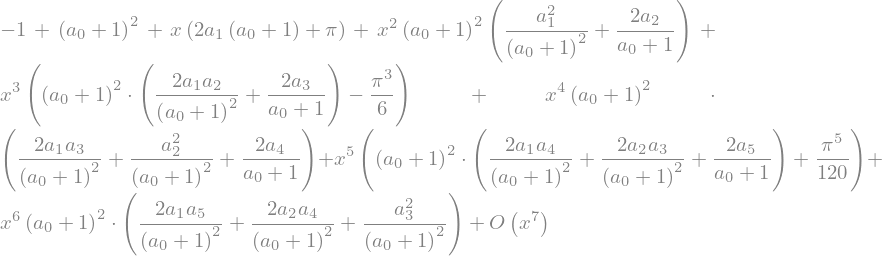

In [17]:
DL2 = series(g(x, DL+1), x, 0, 7)
DL2

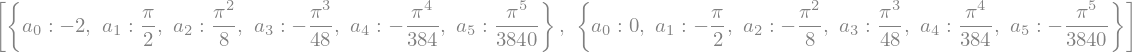

In [18]:
S = solve([DL2.coeff(x, k) for k in range(0, 6)], a0,a1, a2,a3,a4,a5, dict = True)
S

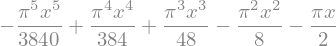

In [19]:
approximation_polynomiale = (DL.subs(S[1])).removeO()
approximation_polynomiale

In [52]:
%%manim -qm Example2
class Example2(ThreeDScene):
    def construct(self):
        axes_config = {
            "x_range": [-4, 4],
            "y_range": [-4, 4],
            "z_range": [-5, 5],
        }

        axes = ThreeDAxes(**axes_config)
        
        self.set_camera_orientation(phi=70*DEGREES,
                                    theta=-40*DEGREES,
                                    distance=6)
        
        self.begin_ambient_camera_rotation(rate=0.9)
        self.add(axes)
        
        text1 = Tex(r"La fonction $g(x,y)=y^2-1+\sin(\pi \times x)$").scale(1) 
        text2 = Tex(r"et le courbe de $\varphi$").scale(1) 
        text1.shift(LEFT*1 + UP*3)
        text2.shift(LEFT*1 + UP*2)
        
        PlaneSurface = Surface(
            lambda u, v: np.array([
                u, v, g(u,v)
            ]), u_range=(-5, 5), v_range=(-5, 5), resolution=(15, 50)
        )
        
        def func_poly(x):
            return -pi**5+x**5/3840+pi**4*x**4/384 + pi**3*x**3/48-pi**2*x**2/8- pi*x/2
        
        # curve = ParametricFunction(lambda t: np.array([
        #     t, func_poly(t), g(t, func_poly(t))
        # ]), color=YELLOW, t_range=(-2, 2))

        self.add_fixed_in_frame_mobjects(text1)
        # self.add_fixed_in_frame_mobjects(text2)
        self.play(Write(text1)) # Without this line, it will appear directly.
        self.play(Write(PlaneSurface), run_time=3)
        self.wait(3)
        # self.play(Write(text2)) # Without this line, it will appear directly.

        self.begin_ambient_camera_rotation(rate=0.9, about="phi")
        
        self.wait(6)

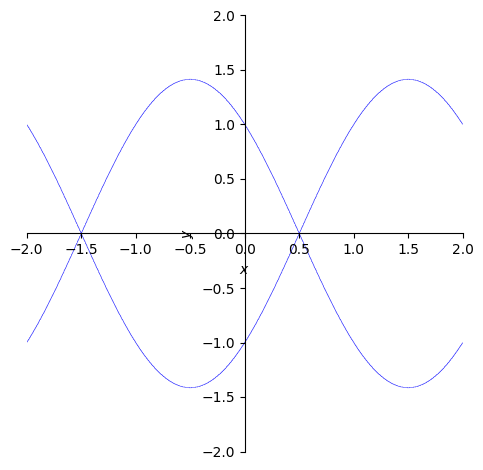

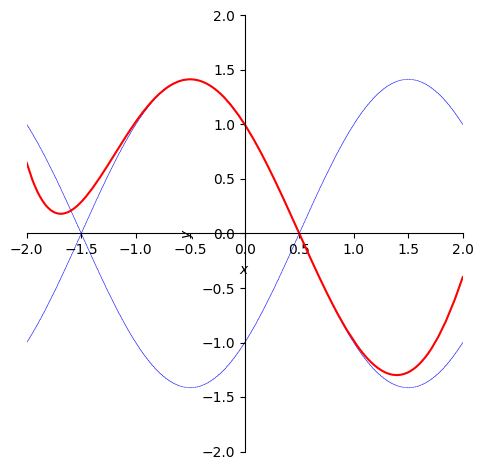

In [20]:
figure1 = plot_implicit(g(x, y), (x, -2,2), (y, -2,2),aspect_ratio=(1,1))
figure2 = plot((approximation_polynomiale+1 ).subs(x, x), (x,-2,2), show=False, line_color='red')
figure1.extend(figure2)
figure1.show()

# Question 3

In [21]:
def sinc(x):
    if x!=0:
        return sin(x)/x
    else:
        return 1

In [22]:
def h(x,y):
    return sinc(x)-sinc(y)

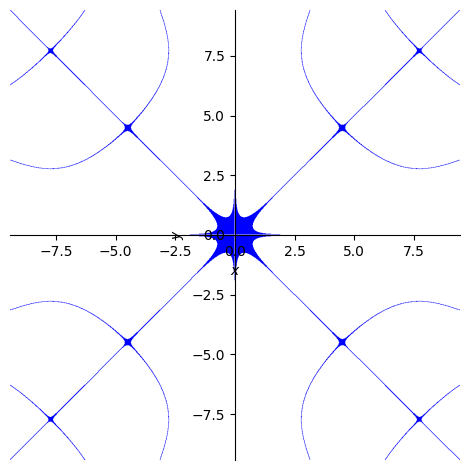

In [23]:
plot_implicit(h(x, y), (x, -3*pi, 3*pi), (y, -3*pi, 3*pi),aspect_ratio=(1,1))

In [24]:
a0, a1, a2, a3 = symbols('a_0 a_1 a_2 a_3 ')
DL = a0+a1*x + O(x**2)
DL

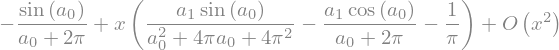

In [25]:
DL2 = series(h(x+pi, DL+2*pi), x, 0, 2)
DL2

In [26]:
S = solve([DL2.coeff(x, k) for k in range(0, 3)], a0,a1, a2, dict = True)
S

On a bien $\psi(\pi)=2\pi$ donc on supprime la deuxième solution.

In [27]:
approximation_polynomiale = (DL.subs(S[0])).removeO()
approximation_polynomiale

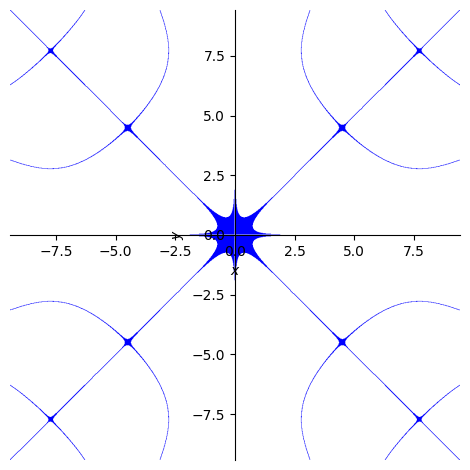

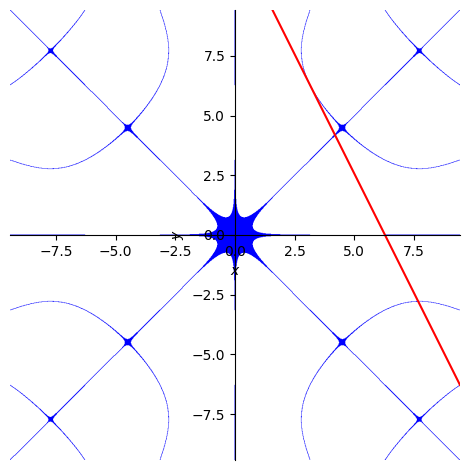

In [28]:
figure1 = plot_implicit(h(x, y), (x, -3*pi, 3*pi), (y, -3*pi, 3*pi),aspect_ratio=(1,1))
figure2 = plot((approximation_polynomiale+2*pi ).subs(x, x-pi ), (x,-3*pi,3*pi), show=False, line_color='red')
figure1.extend(figure2)
figure1.show()